In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

tips_dataframe = sns.load_dataset("tips")
tips_dataframe

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [121]:
tips_dataframe.shape # 행과 열 개수

(244, 7)

In [122]:
tips_dataframe.dtypes # 데이터 타입

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [108]:
tips_dataframe.head(5) # 리스트 상위 5개

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [106]:
tips_dataframe.tail(5) # 리스트 하위 5개

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [123]:
tips_dataframe.describe() # 데이터 통계

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [129]:
tips_dataframe.sort_values(by='total_bill') # 계산금액 정렬

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
149,7.51,2.00,Male,No,Thur,Lunch,2
...,...,...,...,...,...,...,...
182,45.35,3.50,Male,Yes,Sun,Dinner,3
156,48.17,5.00,Male,No,Sun,Dinner,6
59,48.27,6.73,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [128]:
tips_dataframe.sort_values(by='tip') # 팁 금액 정렬

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
236,12.60,1.00,Male,Yes,Sat,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
0,16.99,1.01,Female,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
141,34.30,6.70,Male,No,Thur,Lunch,6
59,48.27,6.73,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
212,48.33,9.00,Male,No,Sat,Dinner,4


In [169]:
tips1 = tips_dataframe.sort_values(by='total_bill')[0:50]
print(f"결제금액 하위 50팀의 팁 평균 : {round(tips1['tip'].mean(), 2)}")

tips2 = tips_dataframe.sort_values(by='total_bill')[-50:]
print(f"결제금액 상위 50팀의 팁 평균 : {round(tips2['tip'].mean(), 2)}")

결제금액 하위 50팀의 팁 평균 : 1.88
결제금액 상위 50팀의 팁 평균 : 4.31


### 2.
계산 금액과 팁 금액 사이에 어떠한 상관 관계가 있을 것 같다. 두 변수의 관계를 시각화하여 나타내고, 선형적 관계가 보이는지 회귀선까지 그어서 표시해라.

In [38]:
tips_dataframe.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


#### 상관성 분석
우선 계산 금액과 팁 금액 사이의 상관성을 분석해보면 양수인 것을 보아 양의 선형관계를 가진다. 즉, 계산 금액이 클수록 팁 역시 클 것으로 예상된다.

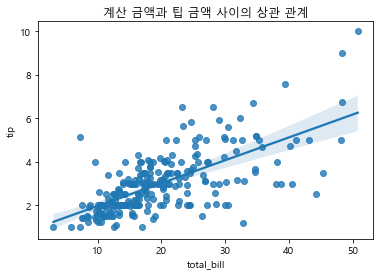

In [92]:
sns.regplot(x='total_bill', y='tip', data=tips_dataframe)
plt.title("계산 금액과 팁 금액 사이의 상관 관계")
plt.show()

#### 관계 시각화
회귀선만 보면 상관성 분석으로 예상했던 결과가 나타난다. 계산 금액과 팁 금액이 양의 선형관계를 가지므로 계산 금액이 클수록 팁도 클 것이라 예상하였는데, 회귀선 역시 같은 관계로 나타난다. 하지만 데이터 분포를 확인해보면 계산 금액이 크다고 해서 팁이 무조건 크다고 할 수는 없다. 데이터 분포를 보면 10을 결제한 손님의 팁이 40을 결제한 손님의 팁보다 큰 경우도 존재한다. 물론 이상치들의 값을 무시하면 안되지만, 이상치들이 모델을 크게 왜곡시키는 것은 아니므로 계산 금액과 팁은 양의 선형관계를 갖는 것이 맞다고 생각한다.

### 3.
요일별로 팁의 발생 횟수가 어떻게 다른지를 시각화해서 나타내어 보아라.

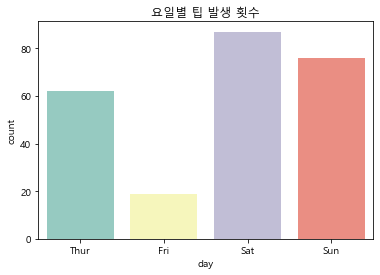

In [55]:
sns.countplot(x='day', data=tips_dataframe, palette='Set3')
plt.title("요일별 팁 발생 횟수")
plt.show()

팁 발생 횟수는 <strong>토요일, 일요일, 목요일, 금요일</strong> 순서대로 높다.

### 4.
요일별 계산금액의 통계적 분포를 한눈에 보고싶다. 시각화해서 나타내어 보아라.

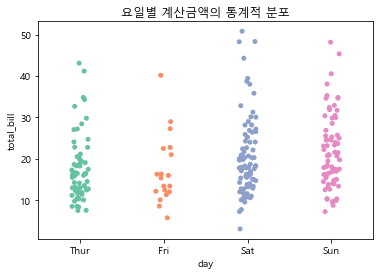

In [60]:
sns.stripplot(x='day',y='total_bill', data=tips_dataframe, palette='Set2')
plt.title("요일별 계산금액의 통계적 분포") 
plt.show()

### 5.
시간대, 요일, 테이블 인원수가 팁 금액과 어떠한 관계가 있는지 한눈에 알 수 있도록 시각화하라.

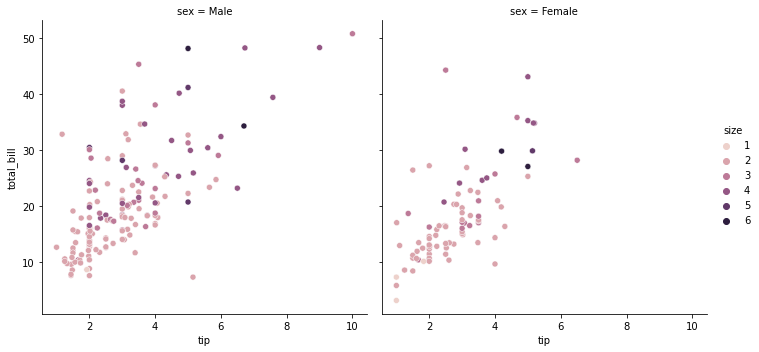

In [40]:
sns.relplot(x="tip", y="total_bill", hue="size", col="sex", data=tips_dataframe)
plt.show()

### 6.
추가적인 EDA를 진행할 수 있다면 진행하고, 얻어낸 Insight로 음식점의 매출액 혹은 팁 금액을 증대시키기 위한 방안을 제시하라.

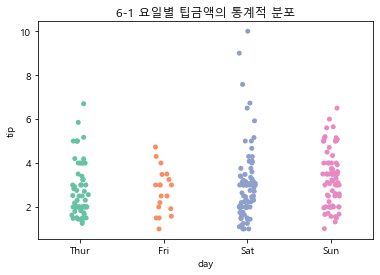

In [82]:
sns.stripplot(x='day',y='tip', data=tips_dataframe, palette='Set2')
plt.title("6-1 요일별 팁금액의 통계적 분포")
plt.show()

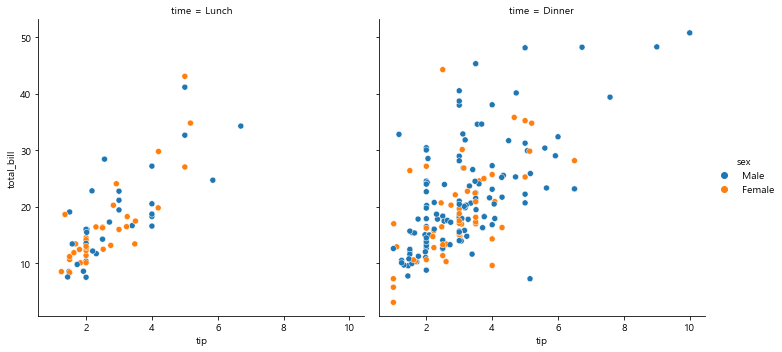

In [85]:
sns.relplot(x="tip", y="total_bill", hue="sex", col="time", data=tips_dataframe)
plt.show()

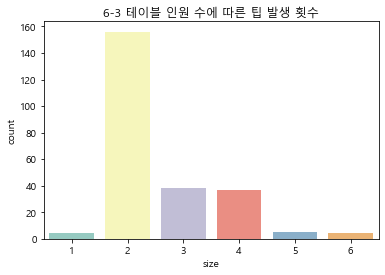

In [89]:
sns.countplot(x='size', data=tips_dataframe, palette='Set3')
plt.title("6-3 테이블 인원 수에 따른 팁 발생 횟수")
plt.show()

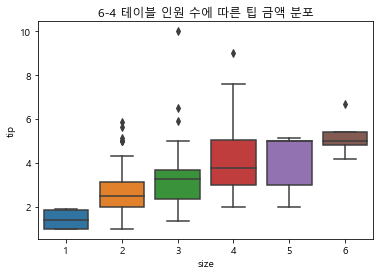

In [99]:
sns.boxplot(x='size', y='tip', data=tips_dataframe)
plt.title("6-4 테이블 인원 수에 따른 팁 금액 분포")
plt.show()

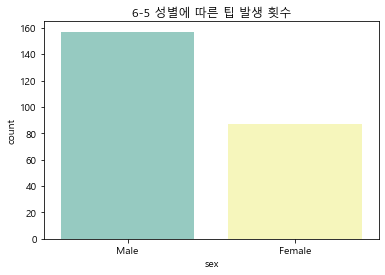

In [112]:
sns.countplot(x='sex', data=tips_dataframe, palette='Set3')
plt.title("6-5 성별에 따른 팁 발생 횟수")
plt.show()

2번 insight
- 계산 금액과 팁 금액은 양의 선형관계를 가진다.

3번 insight
- 팁 발생 횟수가 토요일>일요일>목요일>금요일 순으로 높다.
- 금요일의 팁 발생 횟수가 다른 요일에 비해 많이 낮다.

4번 insight
- 주말인 토요일과 일요일은 계산 금액 분포를 확인했을 때 손님이 많은 것을 알 수 있다. 
- 주말의 계산 금액이 평일에 비해 다소 높은 편이다.
- 목요일은 금요일에 비해, 그리고 평일치고 손님이 많은 편이다.

5번 insight
- 테이블 인원 수가 적을 수록 팁 발생 횟수가 잦다.
- 테이블 인원 수가 많을 수록 팁 금액이 높다.
- 계산 금액과 팁 금액은 거의 정비례한다.

6-1번 insight
- 요일별 팁 금액은 토요일이 가장 높고 많다.
- 평일인 목요일이 일요일과 비슷한 금액 분포를 보이고 있다.

6-2번 insight
- 점심보다 저녁의 팁 발생 횟수가 많다.
- 점심보다 저녁의 팁 금액 분포가 높다.

6-3번 insight
- 인원 수가 2명인 테이블의 팁 발생 횟수가 가장 높다.
- 인원 수와 팁 발생 횟수는 비례하지 않는다.

6-4번 insight
- 인원 수가 많을 수록 팁 금액이 높은 분포를 보인다.

6-5번 insight
- 여성보다 남성의 팁 발생 횟수가 더 높다.

#### 음식점의 매출액 혹은 팁 금액을 증대시키기 위한 방안

- 금요일에 매출이 적은 이유를 파악하고 이를 해결해야 한다. 같은 평일임에도 불구하고 목요일은 매출이 높고 금요일은 매출이 적다. 매주 금요일 한정 메뉴를 개발하거나 개발비용이 부담된다면 평일에 사람이 모일 수 있도록 조성해야 한다. 예를 들어 아울렛 내 매장인 경우 평일만 직원할인이 가능하고 주말은 직원할인이 불가능하다. 이렇게 평일 혜택을 두어 금요일도 매출이 오를 수 있도록 해야 한다.

- 계산하는 사람의 성별이 남성 손님 위주라고 해서 테이블 전체가 남성 손님이라고 판단할 순 없지만, 여성 손님을 불러들일 마케팅이 필요할 것 같다. 팁 금액 역시 남성 손님이 높은 것을 보아 팁 매출의 대부분은 남성 손님이 맡고있다. 이에 따라 여성 손님의 팁 지급 횟수를 증가시켜 매출을 증가시키면 좋을 것 같다. 시즌 메뉴 개발 또는 인스타 마케팅이 도움이 될 것 같다.

- 2인 팀이 주로 방문하는 식당인 것을 보아 2인석 테이블을 늘리면 좋을 것 같다. 웨이팅이 있을 경우 기다리지 않고 다른 식당으로 빠질 수도 있읜 매출을 확인하여 다인석을 쪼개 2인석을 만드는 것이 효율적일 수도 있다. 1인 팀을 위한 1인석 구비는 조금 줄여도 되지만 1인 손님을 위한 혼밥 메뉴가 있으면 좋을 것 같다. 보통 2인 손님이 많다는 것은 가족단위로 오기 힘든 식당이라 판단되며, 그만큼 가격이 높을 것으로 예상된다. 여러 할인혜택을 준비하여 단체 손님이 부담 갖지 않고 방문할 수 있게 해야 한다. 2인 팀보다 3명 이상의 팀이 많은 팁과 계산 금액을 지불하기 때문에 2인 팀에 집중할 경우 오히려 매출이 저조할 수도 있다.